 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()
#whale_returns.describe()
#whale_returns.head()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
2012-10-08,1455.88
2012-10-09,1441.48
2012-10-10,1432.56
2012-10-11,1432.84


In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history.pct_change()

In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
df_daily = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

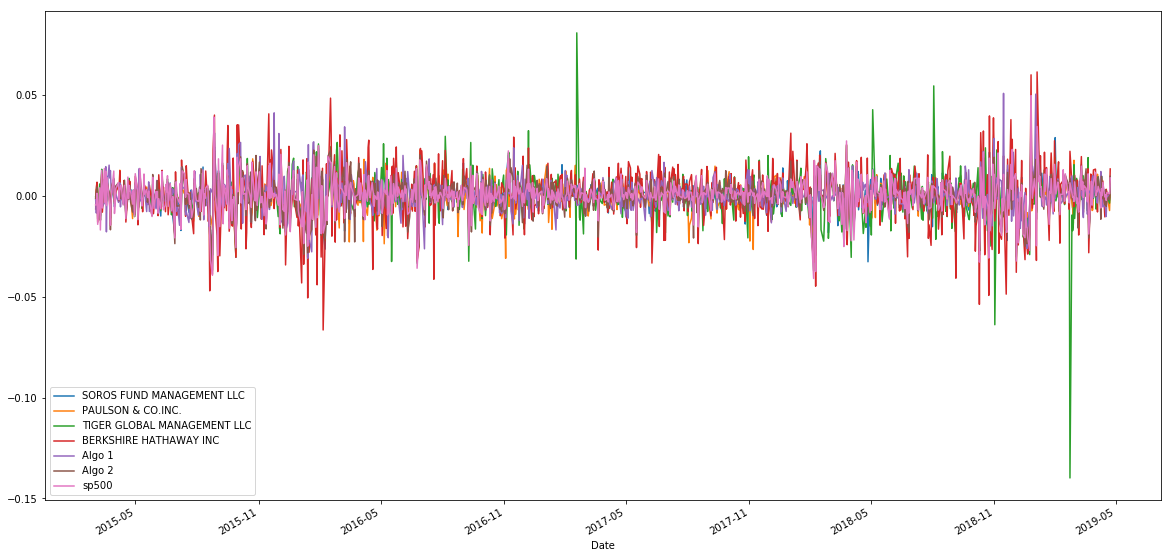

In [15]:
# Plot daily returns
# YOUR CODE HERE
df_daily.plot(figsize = (20,10))

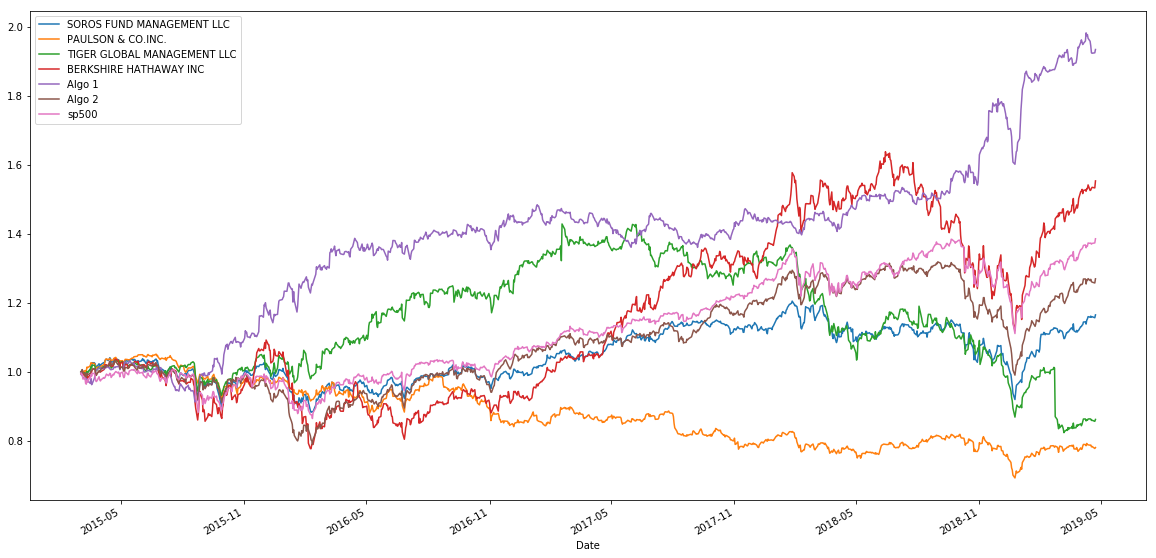

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

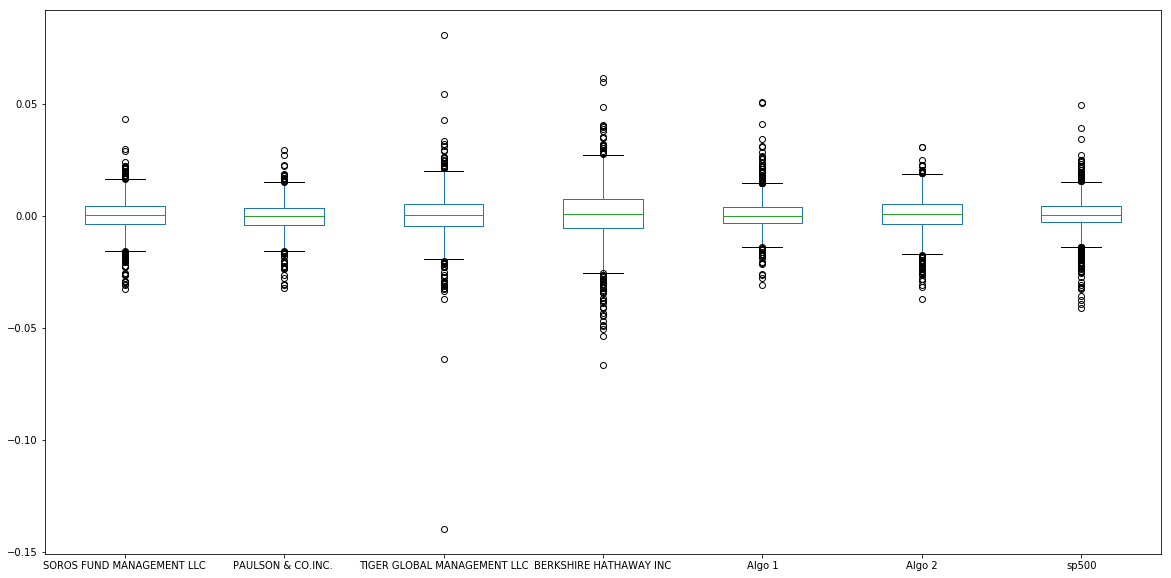

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
df_daily.plot(kind = "box", figsize = (20,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [20]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

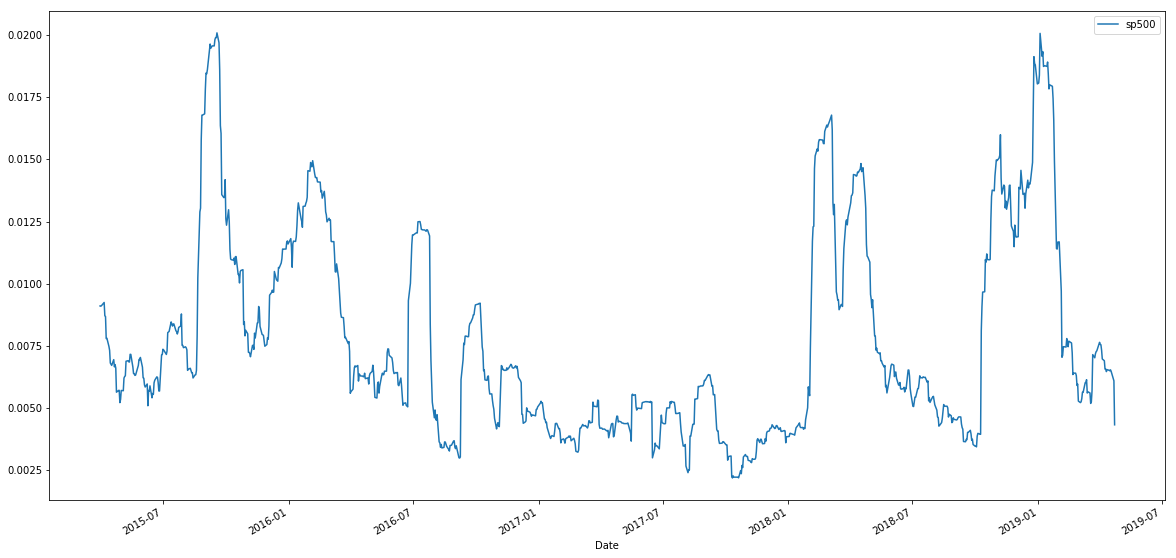

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_rolling_21 = df_daily[["sp500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))

In [22]:
# Correlation
# YOUR CODE HERE
correlation_sp500 = pd.DataFrame(df_daily.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

Algo 2    0.858764
Name: sp500, dtype: float64

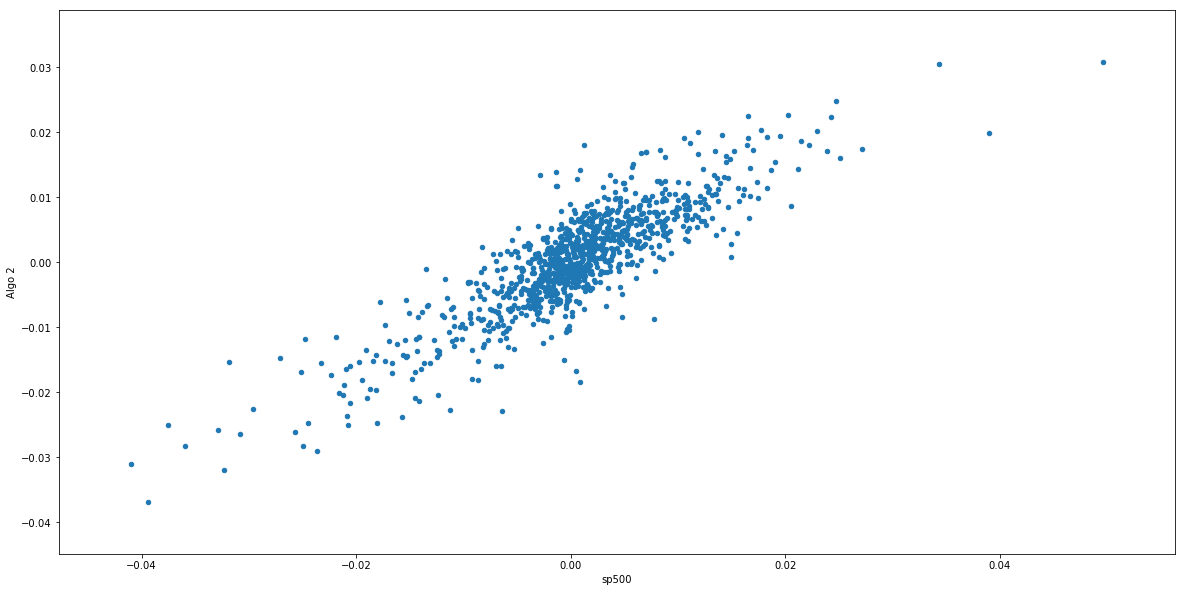

In [23]:
df_daily.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))

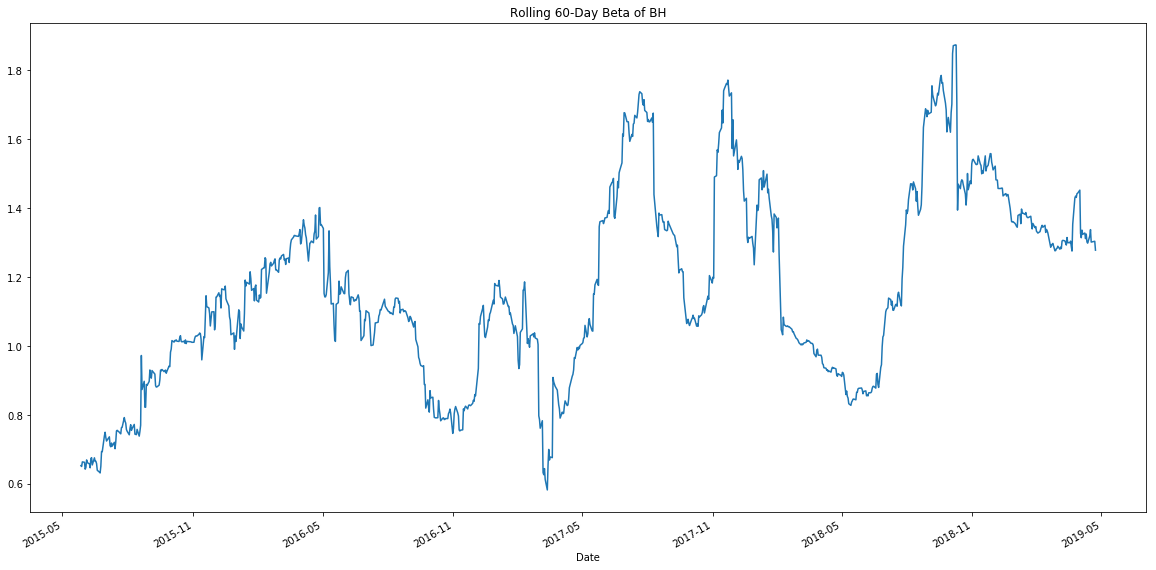

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

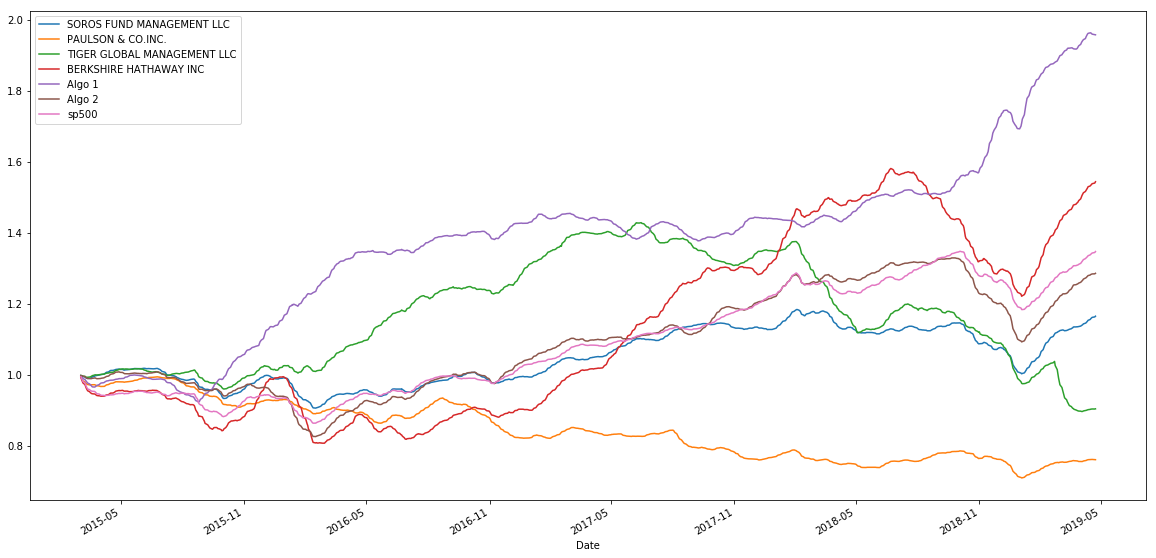

In [25]:
# (OPTIONAL) YOUR CODE HERE
df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [26]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

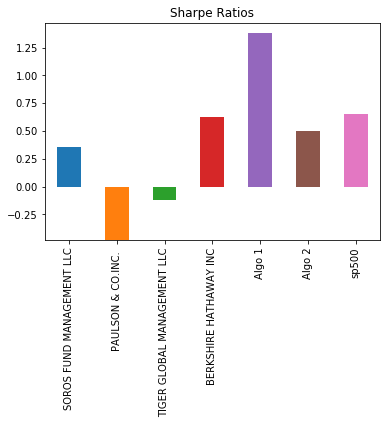

In [28]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")
# algo 1 outperformed market and whales while algo 2 fell below market and BH.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Read the first stock
# YOUR CODE HERE
aapl_history = pd.read_csv(Path("Resources/Apple_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"Close":"aapl"}, inplace = True)
aapl_history.head()

,aapl
Date,
2018-01-02 16:00:00,172.26
2018-01-03 16:00:00,172.23
2018-01-04 16:00:00,173.03
2018-01-05 16:00:00,175.00
2018-01-08 16:00:00,174.35


In [32]:
# Read the second stock
# YOUR CODE HERE
amzn_history = pd.read_csv(Path("Resources/Amazon_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
amzn_history.rename(columns = {"Close":"amzn"}, inplace = True)
amzn_history.head()

,amzn
Date,
2018-01-02 16:00:00,1189.01
2018-01-03 16:00:00,1204.20
2018-01-04 16:00:00,1209.59
2018-01-05 16:00:00,1229.14
2018-01-08 16:00:00,1246.87


In [34]:
# Read the third stock
# YOUR CODE HERE
goog_history = pd.read_csv(Path("Resources/Google_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
goog_history.rename(columns = {"Close":"goog"}, inplace = True)
goog_history.head()

,goog
Date,
2018-01-02 16:00:00,1065.00
2018-01-03 16:00:00,1082.48
2018-01-04 16:00:00,1086.40
2018-01-05 16:00:00,1102.23
2018-01-08 16:00:00,1106.94


In [35]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_stocks = pd.concat((aapl_history, amzn_history, goog_history), axis = 1, join= "inner")
my_stocks.head()

,aapl,amzn,goog
Date,,,
2018-01-02 16:00:00,172.26,1189.01,1065.00
2018-01-03 16:00:00,172.23,1204.20,1082.48
2018-01-04 16:00:00,173.03,1209.59,1086.40
2018-01-05 16:00:00,175.00,1229.14,1102.23
2018-01-08 16:00:00,174.35,1246.87,1106.94


In [36]:
# Reset the index
# YOUR CODE HERE
my_stocks.index = my_stocks.index.normalize()

In [37]:
# Drop Nulls
# YOUR CODE HERE
my_stocks.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_stock_returns = my_stocks.pct_change()
my_stock_returns.dropna(inplace = True)
my_portfolio_returns = my_stock_returns.dot(weights)
my_portfolio_returns.head()

Date
2018-01-03    0.009671
2018-01-04    0.004247
2018-01-05    0.014040
2018-01-08    0.004995
2018-01-09    0.001316
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# YOUR CODE HERE
portfolio_returns = pd.concat((my_portfolio_returns,df_daily), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-01-03,0.009671,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.004247,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.014040,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.004995,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,0.001316,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
2018-01-10,-0.000743,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112
2018-01-11,0.008713,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034
2018-01-12,0.015936,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.006750
2018-01-16,-0.001929,-0.005126,-0.005553,0.009646,-0.011962,0.003931,-0.009533,-0.003524


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
portfolio_returns.dropna(inplace=True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-01-03,0.009671,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.004247,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.014040,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.004995,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,0.001316,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
2018-01-10,-0.000743,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112
2018-01-11,0.008713,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034
2018-01-12,0.015936,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.006750
2018-01-16,-0.001929,-0.005126,-0.005553,0.009646,-0.011962,0.003931,-0.009533,-0.003524


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
# YOUR CODE HERE
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.017501
SOROS FUND MANAGEMENT LLC,0.009947
PAULSON & CO.INC.,0.007438
TIGER GLOBAL MANAGEMENT LLC,0.012531
BERKSHIRE HATHAWAY INC,0.015190
Algo 1,0.007568
Algo 2,0.009013
sp500,0.010757


In [42]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["sp500", "std"]]
higher_std
# It seems to me my portfolio is riskier than all other portolios.

,std
my_portfolio,0.017501
TIGER GLOBAL MANAGEMENT LLC,0.012531
BERKSHIRE HATHAWAY INC,0.015190


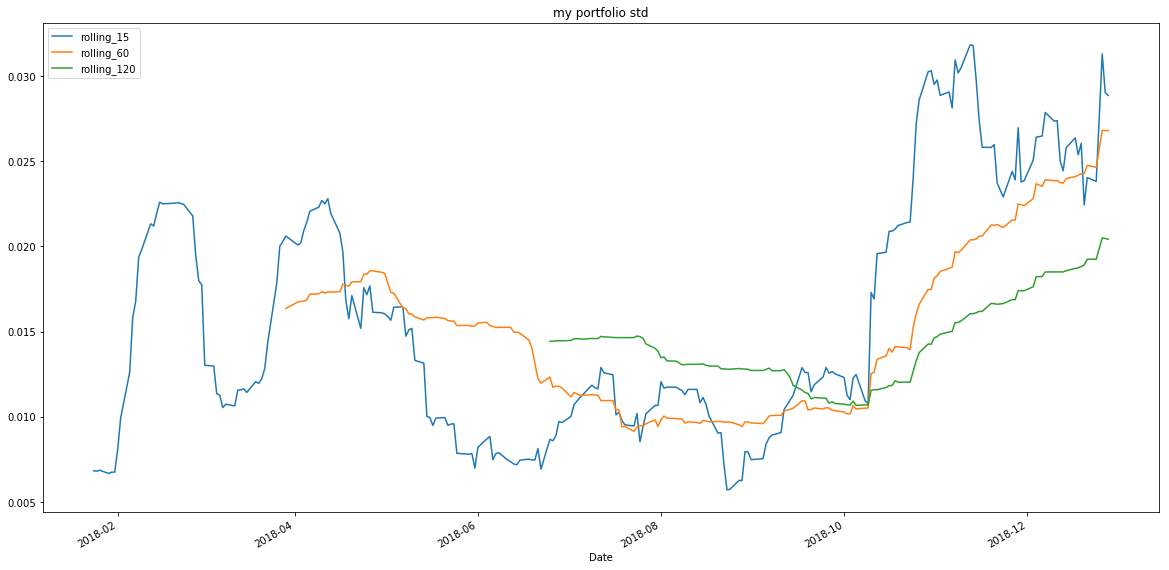

In [43]:
# Rolling
# YOUR CODE HERE
my_portfolio_rolling_15 = portfolio_returns[["my_portfolio"]].rolling(window = 15).std()
my_portfolio_rolling_60 = portfolio_returns[["my_portfolio"]].rolling(window = 60).std()
my_portfolio_rolling_120 = portfolio_returns[["my_portfolio"]].rolling(window = 120).std()
ax = my_portfolio_rolling_15.plot(figsize = (20,10), title = 'my portfolio std')
my_portfolio_rolling_60.plot(ax = ax)
my_portfolio_rolling_120.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

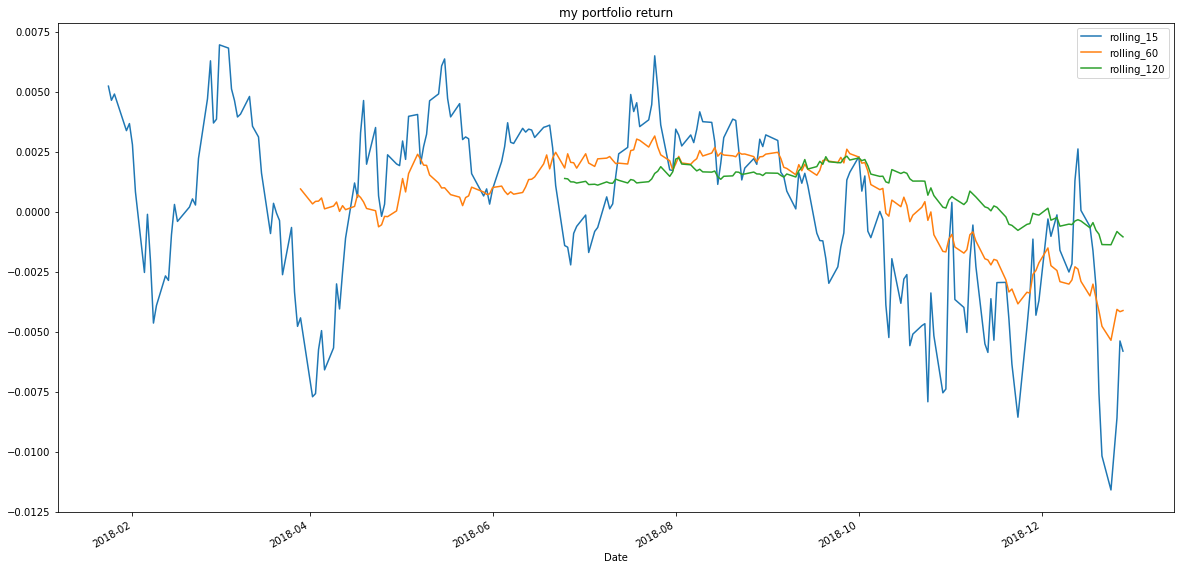

In [44]:
my_portfolio_rolling_15_return = portfolio_returns[["my_portfolio"]].rolling(window = 15).mean()
my_portfolio_rolling_60_return = portfolio_returns[["my_portfolio"]].rolling(window = 60).mean()
my_portfolio_rolling_120_return = portfolio_returns[["my_portfolio"]].rolling(window = 120).mean()
ax = my_portfolio_rolling_15_return.plot(figsize = (20,10), title = 'my portfolio return')
my_portfolio_rolling_60_return.plot(ax = ax)
my_portfolio_rolling_120_return.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

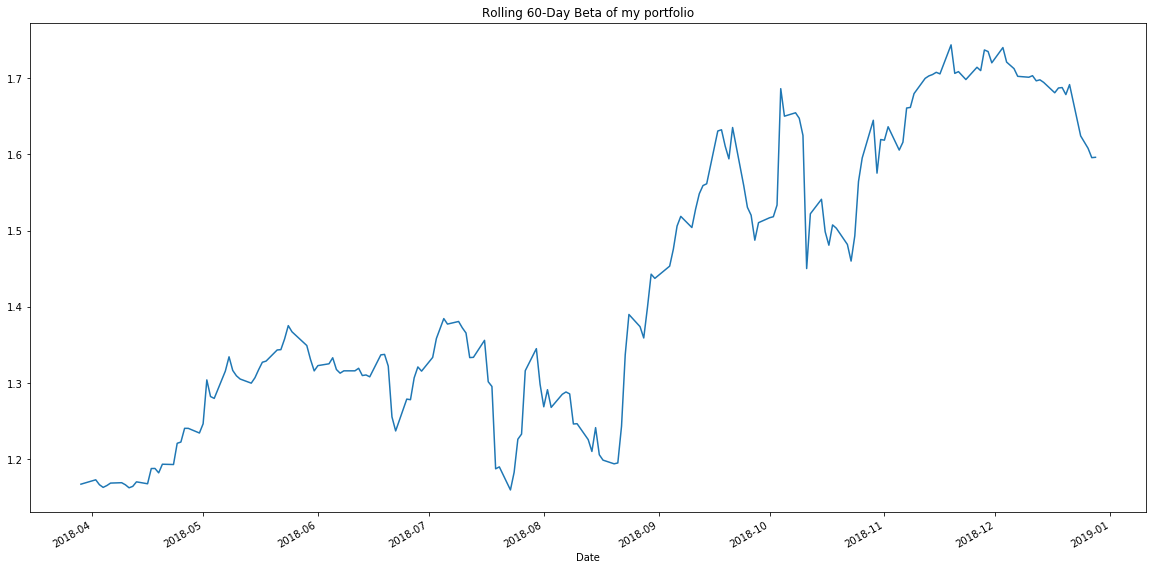

In [45]:
# Beta
# YOUR CODE HERE
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

In [46]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

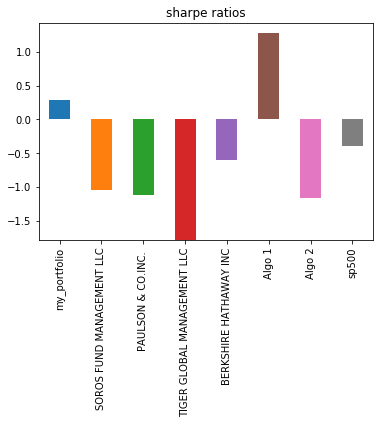

In [47]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [48]:
# YOUR CODE HERE
correlation_my_portfolio = portfolio_returns.corr().loc[:,"my_portfolio"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]
# My portfolio is highly correlated to sp500.

sp500    0.870599
Name: my_portfolio, dtype: float64